### 1.1 Import Statements

In [68]:
import pandas as pd
import networkx as nx
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

### 1.2 Importing Files

In [51]:
rfc = pd.read_csv('REQUESTS_FOR_COMMENT.csv')
users = pd.read_csv('USERS.csv')
wiki = pd.read_csv('WIKIPROJECTS.csv')

print(f"Loaded RFC1.csv with shape: {rfc.shape}")
print(f"Loaded USERS.csv with shape: {users.shape}")
print(f"Loaded WIKIPROJECTS.csv with shape: {wiki.shape}")

Loaded RFC1.csv with shape: (2925, 3)
Loaded USERS.csv with shape: (171692, 3)
Loaded WIKIPROJECTS.csv with shape: (11861, 3)


## 2 Request For Comments

## 3 WIKIPROJECTS

This section is used for graph generation for the "WIKIPROJECTS" file as well as visualization and calculating it's metrics to be used in section 3.3 for comparison between this network and a random network of similar proportion.

### 3.1 WIKIPROJECTS Graph Generation 

#### 3.1.1 Graph Generation

In [76]:
wikiprojects_Graph = nx.Graph()

all_users=set(wiki["username"].unique()) # Storing users w.r.f. unique usernames
wikiprojects_Graph.add_nodes_from(all_users) # Initializing unique users on the graph


thread_user_map = defaultdict(set) # Initializing dictionary to store user interactions
for i, row in wiki.iterrows():
    key = (row["page_name"], row["thread_subject"])
    thread_user_map[key].add(row["username"]) # Storing user interactions w.r.f. unique page name, and thread subject combinations


for users in thread_user_map.values():
    user_list = list(users)
    for i in range(len(user_list)):
        for j in range(i + 1, len(user_list)): 
            wikiprojects_Graph.add_edge(user_list[i], user_list[j]) # Adding edges from dictionary

print("Number of nodes:", wikiprojects_Graph.number_of_nodes())
print("Number of edges:", wikiprojects_Graph.number_of_edges())

Number of nodes: 1620
Number of edges: 6782


#### 3.1.2 Graph Visualization

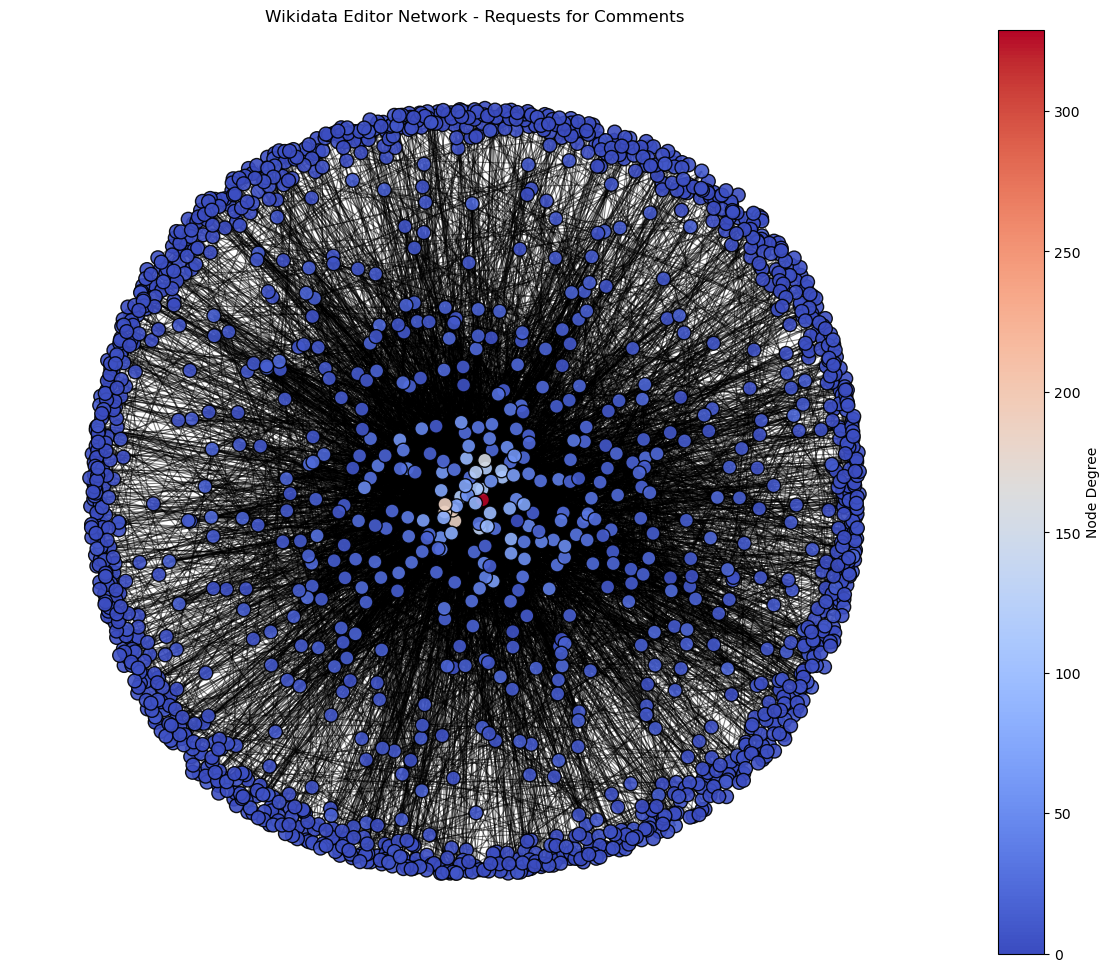

In [77]:
pos = nx.spring_layout(wikiprojects_Graph, seed=42, k=1.1, iterations=100)

fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(wikiprojects_Graph.degree())
node_colors = [node_degrees[n] for n in wikiprojects_Graph.nodes()]

nx.draw_networkx_nodes(
    wikiprojects_Graph, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    wikiprojects_Graph, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - Requests for Comments")

plt.show()

#### 2.1.3 Degree by user

In [78]:
degree_wikiprojects = {node: wikiprojects_Graph.degree(node) for node in wikiprojects_Graph.nodes()}
print(degree_wikiprojects)

{'Kronf': 10, 'Zeroth': 9, 'Mikalagrand': 2, 'Tobias1984': 117, 'Dario (WMF)': 14, 'Averater': 15, 'Nomen ad hoc': 13, 'Discasto': 2, 'Marc_André_Miron': 1, 'Vis M': 0, 'Liridon': 1, 'WhiteHartLane': 0, 'Joachat': 1, 'Japan Football': 1, 'BohemianRhapsody': 1, 'EugeneZelenko': 2, 'StarryGrandma': 1, 'XXN': 5, 'Krishna Chaitanya Velaga': 7, 'Ciell': 0, 'Wallacegromit1': 9, 'Diggr': 10, 'Jura1': 329, 'Matěj Suchánek': 22, 'Markus Krötzsch': 5, 'Abbe98': 2, 'YLSS': 5, 'CanadianOtaku': 0, 'CennoxX': 8, 'Anonymous_username_961': 3, 'Gisele-henne': 2, 'Adam Harangozó': 3, 'DannyS712': 0, 'KevinUp': 1, 'ZI Jony': 2, 'Supaplex': 0, 'William Pietri': 1, 'Givegivetake': 2, 'Kolja21': 131, 'Leiem': 7, 'CarlJohanSveningsson': 3, 'DavRosen': 10, 'Robin Patterson': 0, 'B222': 0, 'Romulanus': 12, 'Sylvain Leroux': 5, 'MichaK': 13, 'Esteban16': 4, 'Windblown29': 0, 'Aluxosm': 2, 'Cassandreces': 3, 'Wylve': 8, 'Bouzinac': 15, 'Sj': 23, 'Beireke1': 3, 'FULBERT': 1, 'Pikador': 1, 'Chase me ladies, I&#39;

#### 2.1.4 Top 5 Contributors

In [79]:
top_contributors_wikiprojects = Counter(degree_wikiprojects).most_common(5)
print(top_contributors_wikiprojects)

[('Jura1', 329), ('VIGNERON', 187), ('TomT0m', 186), ('Snipre', 183), ('Infovarius', 182)]


#### 2.1.5 Average Clustering Coefficient

In [56]:
avg_clustering_RFC = nx.average_clustering(RFC_Graph)
print("Average Clustering Coefficient:", avg_clustering_RFC)


Average Clustering Coefficient: 0.7818077578450455


#### 2.1.6 Number of Connected Components / Size of Largest Connected Component

In [57]:
num_components_RFC = nx.number_connected_components(RFC_Graph)
largest_component_size_RFC = len(max(nx.connected_components(RFC_Graph), key=len))

print("Number of Connected Components:", num_components_RFC)
print("Size of Largest Connected Component:", largest_component_size_RFC)

Number of Connected Components: 54
Size of Largest Connected Component: 833


#### 2.1.7 Betweenness Centrality

In [58]:
betweenness_centrality_RFC = nx.betweenness_centrality(RFC_Graph)
betweenness_centrality_top5_RFC = Counter(betweenness_centrality_RFC).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_RFC)

Betweenness Centrality Top 5: [('ArthurPSmith', 0.05670165049622737), ('Ymblanter', 0.041074190866777514), ('Rschen7754', 0.037914641944748285), ('ChristianKl', 0.03610823450856508), ('GZWDer', 0.03350520090443833)]


### 2.2 Random Network | Request for Comments

This section represents a random network of similar proportions as the network generated in section 2.1. The same visualizations and metrics have been executed on this network for use during comparison in section 2.3.

#### 2.2.1 Graph Generation

In [59]:
N = RFC_Graph.number_of_nodes()
E = RFC_Graph.number_of_edges()
RFC_random = nx.gnm_random_graph(N, E)

print("Number of nodes:", RFC_random.number_of_nodes())
print("Number of edges:", RFC_random.number_of_edges())

Number of nodes: 888
Number of edges: 27569


#### 2.2.2 Graph Visualization

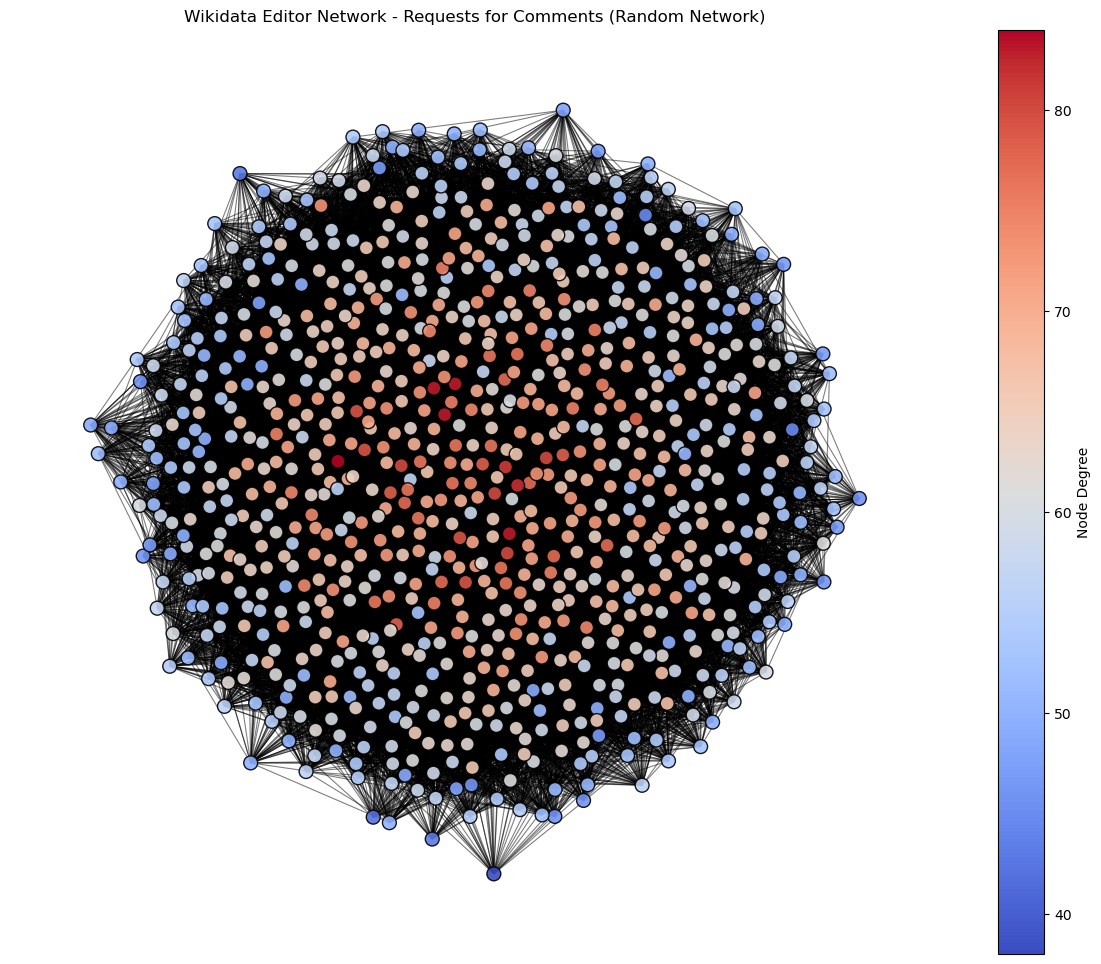

In [60]:
pos = nx.spring_layout(RFC_random, seed=42, k=1.1, iterations=100)

fig, ax = plt.subplots(figsize=(15, 12))

node_degrees = dict(RFC_random.degree())
node_colors = [node_degrees[n] for n in RFC_random.nodes()]

nx.draw_networkx_nodes(
    RFC_random, pos,
    node_color=node_colors,
    cmap=plt.cm.coolwarm,
    node_size=100,
    alpha=0.9,
    edgecolors='black',
    ax=ax
)

nx.draw_networkx_edges(
    RFC_random, pos,
    alpha=0.5,
    width=0.8,
    ax=ax
)

sm = plt.cm.ScalarMappable(
    cmap=plt.cm.coolwarm,
    norm=plt.Normalize(vmin=min(node_degrees.values()), vmax=max(node_degrees.values()))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Node Degree')

ax.set_axis_off()
ax.set_title("Wikidata Editor Network - Requests for Comments (Random Network)")

plt.show()

#### 2.2.3 Degree by user

In [61]:
degree_random_RFC = {node: RFC_random.degree(node) for node in RFC_random.nodes()}
print(degree_random_RFC)

{0: 59, 1: 66, 2: 57, 3: 47, 4: 45, 5: 60, 6: 46, 7: 60, 8: 54, 9: 67, 10: 63, 11: 65, 12: 66, 13: 67, 14: 72, 15: 68, 16: 65, 17: 64, 18: 48, 19: 65, 20: 52, 21: 57, 22: 50, 23: 71, 24: 63, 25: 60, 26: 54, 27: 64, 28: 58, 29: 73, 30: 56, 31: 56, 32: 58, 33: 64, 34: 51, 35: 61, 36: 74, 37: 67, 38: 58, 39: 69, 40: 59, 41: 66, 42: 54, 43: 70, 44: 50, 45: 69, 46: 55, 47: 72, 48: 60, 49: 68, 50: 71, 51: 65, 52: 67, 53: 69, 54: 73, 55: 65, 56: 56, 57: 63, 58: 50, 59: 70, 60: 54, 61: 54, 62: 42, 63: 69, 64: 59, 65: 64, 66: 65, 67: 51, 68: 55, 69: 61, 70: 71, 71: 70, 72: 51, 73: 77, 74: 60, 75: 55, 76: 73, 77: 61, 78: 55, 79: 68, 80: 64, 81: 46, 82: 53, 83: 50, 84: 61, 85: 66, 86: 54, 87: 75, 88: 56, 89: 71, 90: 59, 91: 59, 92: 43, 93: 53, 94: 77, 95: 53, 96: 63, 97: 49, 98: 63, 99: 50, 100: 68, 101: 69, 102: 66, 103: 58, 104: 55, 105: 69, 106: 55, 107: 46, 108: 59, 109: 60, 110: 65, 111: 63, 112: 60, 113: 68, 114: 54, 115: 53, 116: 57, 117: 59, 118: 64, 119: 76, 120: 72, 121: 56, 122: 52, 12

#### 2.2.4 Top 5 Contributors

In [62]:
top_contributors_random_RFC = Counter(degree_random_RFC).most_common(5)
print(top_contributors_random_RFC)

[(466, 84), (130, 83), (224, 83), (809, 83), (856, 83)]


#### 2.2.5 Average Clustering Coefficient

In [63]:
avg_clustering_random_RFC = nx.average_clustering(RFC_random)
print("Average Clustering Coefficient:", avg_clustering_random_RFC)


Average Clustering Coefficient: 0.07049103802109816


#### 2.2.6 Number of Connected Components / Size of Largest Connected Component

In [64]:
num_components_random_RFC = nx.number_connected_components(RFC_random)
largest_component_size_random_RFC = len(max(nx.connected_components(RFC_random), key=len))

print("Number of Connected Components:", num_components_random_RFC)
print("Size of Largest Connected Component:", largest_component_size_random_RFC)

Number of Connected Components: 1
Size of Largest Connected Component: 888


#### 2.2.7 Betweenness Centrality

In [49]:
betweenness_centrality_random_RFC = nx.betweenness_centrality(RFC_random)
betweenness_centrality_top5_random_RFC = Counter(betweenness_centrality_random_RFC).most_common(5)
print("Betweenness Centrality Top 5:", betweenness_centrality_top5_random_RFC)

Betweenness Centrality Top 5: [(823, 0.002273286050546465), (132, 0.002091544461535513), (376, 0.001988701396669736), (568, 0.0019652482488110414), (772, 0.0019086237722774268)]


### 2.3 Comparison | Request for Comments | (Actual Network vs Random Network)

#### 2.3.1 Degree Comparison

In [70]:
print("--------Average--------")
print("Average Degree of Actual Network: ", sum(degree_RFC.values())/len(degree_RFC))
print("Average Degree of Random Network: ", sum(degree_random_RFC.values())/len(degree_random_RFC))
print("--------Standard Deviation--------")
print("Standard Deviation of Degree of Actual Network: ", np.std(list(degree_RFC.values())))
print("Standard Deviation of Degree of Random Network: ", np.std(list(degree_random_RFC.values())))
print("--------Median--------")
print("Median of Degree of Actual Network: ", np.median(list(degree_RFC.values())))
print("Median of Degree of Random Network: ", np.median(list(degree_random_RFC.values())))


--------Average--------
Average Degree of Actual Network:  62.09234234234234
Average Degree of Random Network:  62.09234234234234
--------Standard Deviation--------
Standard Deviation of Degree of Actual Network:  72.15403964336144
Standard Deviation of Degree of Random Network:  7.527010515883789
--------Median--------
Median of Degree of Actual Network:  36.0
Median of Degree of Random Network:  62.0


#### 2.3.2 Top 5 Contributors

In [66]:
print("Top 5 Contributors of Actual Network: ", top_contributors_RFC)
print("Top 5 Contributors of Random Network: ", top_contributors_random_RFC)

Top 5 Contributors of Actual Network:  [('Rschen7754', 458), ('ArthurPSmith', 423), ('Ymblanter', 418), ('Stryn', 383), ('TomT0m', 374)]
Top 5 Contributors of Random Network:  [(466, 84), (130, 83), (224, 83), (809, 83), (856, 83)]


#### 2.3.3 Average Clustering Coefficient

In [71]:
print("Average Clustering Coefficient of Actual Network: ", avg_clustering_RFC)
print("Average Clustering Coefficient of Random Network: ", avg_clustering_random_RFC)

Average Clustering Coefficient of Actual Network:  0.7818077578450455
Average Clustering Coefficient of Random Network:  0.07049103802109816


#### 2.3.4 Number of Connected Components

In [72]:
print("Number of Connected Components of Actual Network: ", num_components_RFC)
print("Number of Connected Components of Random Network: ", num_components_random_RFC)

Number of Connected Components of Actual Network:  54
Number of Connected Components of Random Network:  1


#### 2.3.5 Size of Largest Connected Component

In [73]:
print("Size of Largest Connected Component of Actual Network: ", largest_component_size_RFC)
print("Size of Largest Connected Component of Random Network: ", largest_component_size_random_RFC)

Size of Largest Connected Component of Actual Network:  833
Size of Largest Connected Component of Random Network:  888


#### 2.3.6 Betweenness Centrality (Top 5)

In [75]:
print("Betweenness Centrality Top 5 of Actual Network: ", betweenness_centrality_top5_RFC)
print("Betweenness Centrality Top 5 of Random Network: ", betweenness_centrality_top5_random_RFC)

Betweenness Centrality Top 5 of Actual Network:  [('ArthurPSmith', 0.05670165049622737), ('Ymblanter', 0.041074190866777514), ('Rschen7754', 0.037914641944748285), ('ChristianKl', 0.03610823450856508), ('GZWDer', 0.03350520090443833)]
Betweenness Centrality Top 5 of Random Network:  [(823, 0.002273286050546465), (132, 0.002091544461535513), (376, 0.001988701396669736), (568, 0.0019652482488110414), (772, 0.0019086237722774268)]
